In [173]:
#Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import requests

In [174]:
#import csv
ontimeMarketing = "T_ONTIME_MARKETING.csv"
airlineData = pd.read_csv(ontimeMarketing, encoding="utf-8",dtype=object)
cleanAirlineData = airlineData[["ORIGIN_CITY_NAME", 
                                "ORIGIN_STATE_ABR", 
                                "DEST_CITY_NAME", 
                                "DEST_STATE_ABR", 
                                "CRS_DEP_TIME", 
                                "DEP_TIME", 
                                "DEP_DELAY", 
                                "TAXI_OUT", 
                                "TAXI_IN", 
                                "ARR_TIME", 
                                "ARR_DELAY", 
                                "CANCELLED", 
                                "CANCELLATION_CODE", 
                                "DIVERTED", 
                                "CARRIER_DELAY", 
                                "WEATHER_DELAY", 
                                "NAS_DELAY", 
                                "SECURITY_DELAY", 
                                "LATE_AIRCRAFT_DELAY", 
                                "DIV_AIRPORT_LANDINGS", 
                                "DIV_ACTUAL_ELAPSED_TIME"]].fillna(0.00)
cleanAirlineData

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"New York, NY",NY,"Los Angeles, CA",CA,0900,0852,-8,18,5,1124,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232,-3,17,12,2107,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
2,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754,-6,18,8,2041,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
3,"Los Angeles, CA",CA,"Boston, MA",MA,0750,0742,-8,20,15,1638,...,0,0.0,0,0,0,19,0,0,0,0.0
4,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458,-4,22,5,1654,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582420,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,1200,1203,3,12,5,1218,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582421,"Seattle, WA",WA,"Denver, CO",CO,1800,1842,42,15,5,2218,...,0,0.0,0,0,0,6,0,42,0,0.0
582422,"Orlando, FL",FL,"Austin, TX",TX,0705,0703,-2,18,4,0907,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582423,"Los Angeles, CA",CA,"Sacramento, CA",CA,1315,1430,75,15,3,1549,...,0,0.0,0,69,0,0,0,0,0,0.0


In [191]:
#GEOAPIfy
from config import geoapify_key
# Set the search parameters
target_city = "Chicago, IL"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

ModuleNotFoundError: No module named 'config'

In [192]:
# Extract lat/lon
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{target_city}: {lat}, {lon}")

NameError: name 'response' is not defined

In [ ]:
 # update params dict
target_city = "Chicago-O'Hare-International-Airport"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

 # Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

In [ ]:
 # Extract lat/lon
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]

# Print results
print(f"{target_city}: {lat}, {lon}")

In [189]:
#Filter to Chicago, IL flights only
chicagoAirlines = cleanAirlineData.loc[(cleanAirlineData["ORIGIN_CITY_NAME"] == "Chicago, IL") | 
(cleanAirlineData["DEST_CITY_NAME"] == "Chicago, IL")]

chicagoAirlines

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
121,"Chicago, IL",IL,"Washington, DC",VA,1613,1609,-4,14,3,1907,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
122,"Philadelphia, PA",PA,"Chicago, IL",IL,1340,1334,-6,13,9,1434,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
199,"Chicago, IL",IL,"Dallas/Fort Worth, TX",TX,0626,0627,1,11,14,0902,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
283,"Chicago, IL",IL,"Dallas/Fort Worth, TX",TX,0826,0822,-4,12,16,1040,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
333,"Phoenix, AZ",AZ,"Chicago, IL",IL,1956,2041,45,18,7,0057,...,0,0.0,0,29,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582373,"Chicago, IL",IL,"Phoenix, AZ",AZ,1315,1320,5,9,5,1544,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582374,"Orlando, FL",FL,"Chicago, IL",IL,1045,1040,-5,21,5,1233,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582388,"Chicago, IL",IL,"Denver, CO",CO,0730,0725,-5,13,6,0846,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582396,"Dallas, TX",TX,"Chicago, IL",IL,0705,0700,-5,8,4,0903,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [177]:
#Comparison for reason of delay
#Counts of delay reasons
delayedFlights = chicagoAirlines.loc[(chicagoAirlines["DEP_DELAY"].astype(float)>0.0) | (chicagoAirlines["ARR_DELAY"].astype(float)> 0.0)]
delayedFlights [["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME", "DEST_STATE_ABR", "DEP_DELAY", "TAXI_OUT", 
                 "TAXI_IN", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY",
                 "DIV_ACTUAL_ELAPSED_TIME"]]
delayedFlights

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
121,"Chicago, IL",IL,"Washington, DC",VA,1613,1609,-4,14,3,1907,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
199,"Chicago, IL",IL,"Dallas/Fort Worth, TX",TX,0626,0627,1,11,14,0902,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
333,"Phoenix, AZ",AZ,"Chicago, IL",IL,1956,2041,45,18,7,0057,...,0,0.0,0,29,0,0,0,0,0,0.0
386,"Chicago, IL",IL,"Phoenix, AZ",AZ,1855,1919,24,15,6,2222,...,0,0.0,0,7,0,1,0,17,0,0.0
387,"Phoenix, AZ",AZ,"Chicago, IL",IL,1321,1340,19,21,12,1817,...,0,0.0,0,19,0,6,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582158,"Boston, MA",MA,"Chicago, IL",IL,1230,1255,25,11,4,1413,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582160,"Chicago, IL",IL,"Fort Lauderdale, FL",FL,1410,1411,1,6,7,1750,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582361,"Chicago, IL",IL,"Washington, DC",VA,1000,0954,-6,14,9,1253,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582368,"Nashville, TN",TN,"Chicago, IL",IL,0650,0650,0,38,7,0852,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [178]:
# Collect flight info for delay reason
delay_columns = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
delay_data = delayedFlights[delay_columns]

# Convert delay column values to number
delay_data = delay_data.apply(pd.to_numeric, errors='coerce')

# Filter rows where all delay columns are 0.0
all_zero_rows = delay_data[delay_data.eq(0.0).all(axis=1)]

# Print the number of rows with all delay columns as 0.0
num_all_zero_rows = all_zero_rows.shape[0]
print(f"Number of rows with all delay columns as 0.0: {num_all_zero_rows}")

# Obtain counts for delay types based on delay type columns with a value greater than 0.0 for each row
delay_counts = {"CARRIER_DELAY": 0, "WEATHER_DELAY": 0, "NAS_DELAY": 0, "SECURITY_DELAY": 0, "LATE_AIRCRAFT_DELAY": 0}

for index, row in delay_data.iterrows():
    for col in delay_columns:
        if row[col] > 0.0:
            delay_counts[col] += 1

print("Counts for delay types")
for key, value in delay_counts.items():
    print(f"{key}: {value}")

Number of rows with all delay columns as 0.0: 13616
Counts for delay types
CARRIER_DELAY: 7463
WEATHER_DELAY: 2276
NAS_DELAY: 8550
SECURITY_DELAY: 65
LATE_AIRCRAFT_DELAY: 7832


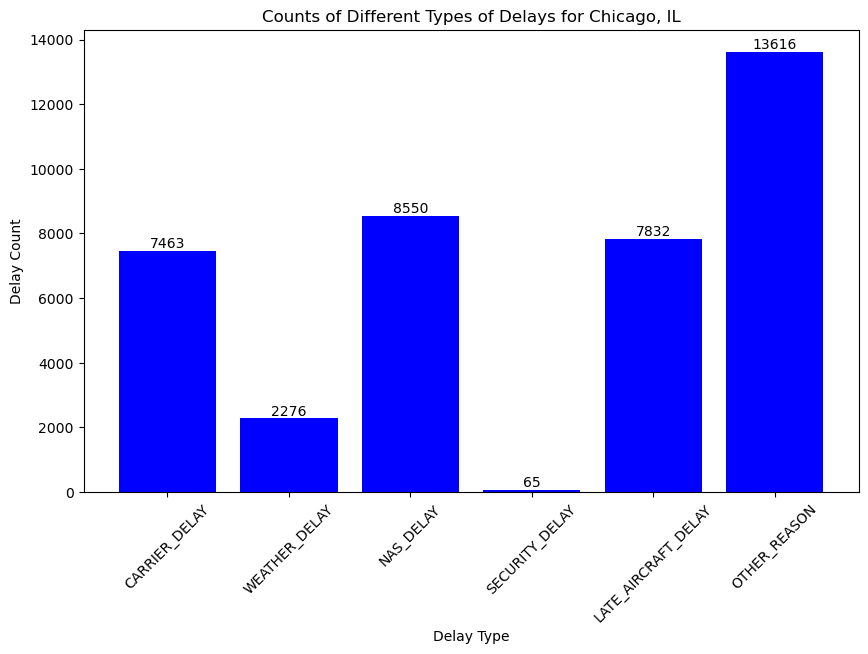

In [182]:
# Create a Bar Chart showing the different types of delays

# Convert columns to numeric type using .loc
delayedFlights.loc[:, 'CARRIER_DELAY'] = pd.to_numeric(delayedFlights['CARRIER_DELAY'], errors='coerce')
delayedFlights.loc[:, 'WEATHER_DELAY'] = pd.to_numeric(delayedFlights['WEATHER_DELAY'], errors='coerce')
delayedFlights.loc[:, 'NAS_DELAY'] = pd.to_numeric(delayedFlights['NAS_DELAY'], errors='coerce')
delayedFlights.loc[:, 'SECURITY_DELAY'] = pd.to_numeric(delayedFlights['SECURITY_DELAY'], errors='coerce')
delayedFlights.loc[:, 'LATE_AIRCRAFT_DELAY'] = pd.to_numeric(delayedFlights['LATE_AIRCRAFT_DELAY'], errors='coerce')

# Calculate the counts for each delay type
count_carrier_delay = len(delayedFlights[delayedFlights['CARRIER_DELAY'] > 0.0])
count_weather_delay = len(delayedFlights[delayedFlights['WEATHER_DELAY'] > 0.0])
count_nas_delay = len(delayedFlights[delayedFlights['NAS_DELAY'] > 0.0])
count_security_delay = len(delayedFlights[delayedFlights['SECURITY_DELAY'] > 0.0])
count_late_aircraft_delay = len(delayedFlights[delayedFlights['LATE_AIRCRAFT_DELAY'] > 0.0])

# Calculate the count for rows with all delay columns as 0.0
num_all_zero_rows = len(delayedFlights[(delayedFlights['CARRIER_DELAY'] == 0.0) & 
                        (delayedFlights['WEATHER_DELAY'] == 0.0) & (delayedFlights['NAS_DELAY'] == 0.0) & 
                        (delayedFlights['SECURITY_DELAY'] == 0.0) & (delayedFlights['LATE_AIRCRAFT_DELAY'] == 0.0)])

# Create the delay_counts dictionary including the "Other reason" category
delay_counts = {
    "CARRIER_DELAY": count_carrier_delay,
    "WEATHER_DELAY": count_weather_delay,
    "NAS_DELAY": count_nas_delay,
    "SECURITY_DELAY": count_security_delay,
    "LATE_AIRCRAFT_DELAY": count_late_aircraft_delay,
    "OTHER_REASON": num_all_zero_rows
}

# Create a list of delay types and their corresponding counts
delay_types = list(delay_counts.keys())
delay_counts_values = list(delay_counts.values())

#Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(delay_types, delay_counts_values, color='blue')

# Add annotations for each bar with the corresponding counts
for bar, count in zip(bars, delay_counts_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

# Add labels
plt.xlabel('Delay Type')
plt.ylabel('Delay Count')
plt.title('Counts of Different Types of Delays for Chicago, IL')
plt.xticks(rotation=45)
plt.savefig("Chicago_Delay_Counts.png")
plt.show()

For departure delays, in 0-15 mins, there are 5278 delays
For arrival delays, in 0-15 mins, there are 4260 delays
For departure delays, in 15-30 mins, there are 2238 delays
For arrival delays, in 15-30 mins, there are 2083 delays
For departure delays, in 30-60 mins, there are 2179 delays
For arrival delays, in 30-60 mins, there are 2011 delays
For departure delays, in 60-120 mins, there are 1918 delays
For arrival delays, in 60-120 mins, there are 1550 delays
For departure delays, in 120+ mins, there are 1550 delays
For arrival delays, in 120+ mins, there are 1523 delays


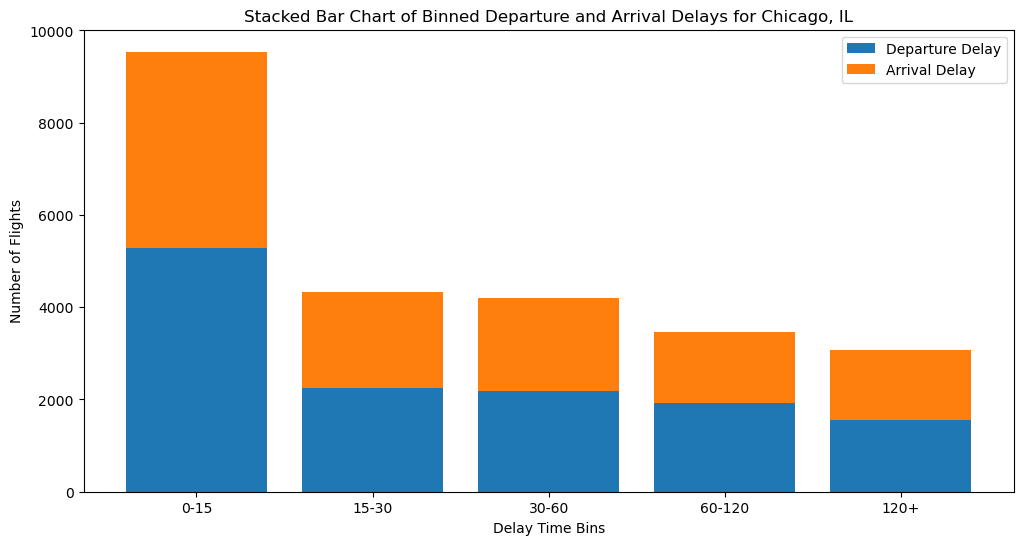

In [183]:
# Time of Delay (length); create a stacked bar chart based on departures from target city & arrivals to target city
# Binned to different intervals
delayedFlights [["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME", "DEST_STATE_ABR", "DEP_DELAY", "TAXI_OUT", 
                 "TAXI_IN", "ARR_DELAY", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY",
                 "DIV_ACTUAL_ELAPSED_TIME"]]
# Convert 'ARR_DELAY' and 'DEP_DELAY' columns to numeric type using .loc
delayedFlights.loc[:, 'ARR_DELAY'] = pd.to_numeric(delayedFlights['ARR_DELAY'], errors='coerce')
delayedFlights.loc[:, 'DEP_DELAY'] = pd.to_numeric(delayedFlights['DEP_DELAY'], errors='coerce')

# Filter for rows where either DEP_DELAY is non-negative for origin city Chicago, IL or ARR_DELAY is non-negative for destination city Chicago, IL
filtered_flights = delayedFlights[((delayedFlights['ORIGIN_CITY_NAME'] == 'Chicago, IL') & (delayedFlights['DEP_DELAY'] >= 0)) |
                                  ((delayedFlights['DEST_CITY_NAME'] == 'Chicago, IL') & (delayedFlights['ARR_DELAY'] >= 0))]

# Display the filtered DataFrame
filtered_flights

# Define the bins for delay intervals
bins = [0, 15, 30, 60, 120, float('inf')]
labels = ['0-15', '15-30', '30-60', '60-120', '120+']

# Filter for flights departing from Chicago, IL and bin the departure delays
dep_delay_chicago = filtered_flights[filtered_flights['ORIGIN_CITY_NAME'] == 'Chicago, IL'].copy()
dep_delay_chicago.loc[:, 'DEP_DELAY_BIN'] = pd.cut(dep_delay_chicago['DEP_DELAY'], bins=bins, labels=labels, right=False)

# Filter for flights arriving at Chicago, IL and bin the arrival delays
arr_delay_chicago = filtered_flights[filtered_flights['DEST_CITY_NAME'] == 'Chicago, IL'].copy()
arr_delay_chicago.loc[:, 'ARR_DELAY_BIN'] = pd.cut(arr_delay_chicago['ARR_DELAY'], bins=bins, labels=labels, right=False)

# Group by the bins and count the number of flights for departure and arrival delays
dep_delay_counts = dep_delay_chicago['DEP_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)
arr_delay_counts = arr_delay_chicago['ARR_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)

# Create a stacked bar chart for binned departure and arrival delays
plt.figure(figsize=(12, 6))
plt.bar(labels, dep_delay_counts, label='Departure Delay')
plt.bar(labels, arr_delay_counts, bottom=dep_delay_counts, label='Arrival Delay')

plt.xlabel('Delay Time Bins')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Chart of Binned Departure and Arrival Delays for Chicago, IL')
plt.legend()

# Print the counts as text below the chart
for i, label in enumerate(labels):
    print(f'For departure delays, in {label} mins, there are {dep_delay_counts[label]} delays')
    print(f'For arrival delays, in {label} mins, there are {arr_delay_counts[label]} delays')
plt.savefig("Chicago_Stacked_Bar.png")
plt.show()


In [181]:
#Credit To Lauren Graves for the majority of this section's code!
# Filter for flights departing from Chicago, IL and find the maximum DEP_DELAY
max_dep_delay_chicago = delayedFlights.loc[delayedFlights["ORIGIN_CITY_NAME"] == "Chicago, IL", "DEP_DELAY"].max()

# Filter for flights arriving at Chicago, IL and find the maximum ARR_DELAY
max_arr_delay_chicago = delayedFlights.loc[delayedFlights["DEST_CITY_NAME"] == "Chicago, IL", "ARR_DELAY"].max()

print("Maximum Arrival Delay for Chicago, IL:", max_arr_delay_chicago)
print("Maximum Departure Delay for Chicago, IL:", max_dep_delay_chicago)

# Convert 'ARR_DELAY' and 'DEP_DELAY' columns to numeric type using .loc
delayedFlights.loc[:, "ARR_DELAY"] = pd.to_numeric(delayedFlights["ARR_DELAY"], errors='coerce')
delayedFlights.loc[:, "DEP_DELAY"] = pd.to_numeric(delayedFlights["DEP_DELAY"], errors='coerce')

# Filter for flights where the origin city is Chicago, IL and find the minimum DEP_DELAY
min_dep_delay_chicago = delayedFlights.loc[(delayedFlights["ORIGIN_CITY_NAME"] == "Chicago, IL") & (delayedFlights["DEP_DELAY"] >= 0), "DEP_DELAY"].min()

# Filter for flights where the destination city is Chicago, IL and find the minimum ARR_DELAY
min_arr_delay_chicago = delayedFlights.loc[(delayedFlights["DEST_CITY_NAME"] == "Chicago, IL") & (delayedFlights["ARR_DELAY"] >= 0), "ARR_DELAY"].min()

print("Minimum Departure Delay for flights from Chicago, IL (excluding negative values):", min_dep_delay_chicago)
print("Minimum Arrival Delay for flights to Chicago, IL (excluding negative values):", min_arr_delay_chicago)

# Filter for rows where either DEP_DELAY is non-negative for origin city Chicago, IL or ARR_DELAY is non-negative for destination city Chicago, IL
filtered_flights = delayedFlights[((delayedFlights["ORIGIN_CITY_NAME"] == "Chicago, IL") & (delayedFlights["DEP_DELAY"] >= 0)) |
                                  ((delayedFlights["DEST_CITY_NAME"] == "Chicago, IL") & (delayedFlights["ARR_DELAY"] >= 0))]

# Display the filtered DataFrame
filtered_flights

Maximum Arrival Delay for Chicago, IL: 2800.0
Maximum Departure Delay for Chicago, IL: 2232
Minimum Departure Delay for flights from Chicago, IL (excluding negative values): 0
Minimum Arrival Delay for flights to Chicago, IL (excluding negative values): 0.0


,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
199,"Chicago, IL",IL,"Dallas/Fort Worth, TX",TX,0626,0627,1,11,14,0902,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
333,"Phoenix, AZ",AZ,"Chicago, IL",IL,1956,2041,45,18,7,0057,...,0,0.0,0,29.0,0.0,0.0,0.0,0.0,0,0.0
386,"Chicago, IL",IL,"Phoenix, AZ",AZ,1855,1919,24,15,6,2222,...,0,0.0,0,7.0,0.0,1.0,0.0,17.0,0,0.0
387,"Phoenix, AZ",AZ,"Chicago, IL",IL,1321,1340,19,21,12,1817,...,0,0.0,0,19.0,0.0,6.0,0.0,0.0,0,0.0
393,"Chicago, IL",IL,"Phoenix, AZ",AZ,1326,1331,5,17,5,1610,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582073,"Orlando, FL",FL,"Chicago, IL",IL,1855,1959,64,11,4,2138,...,0,0.0,0,0.0,0.0,0.0,53.0,0.0,0,0.0
582124,"Chicago, IL",IL,"Tampa, FL",FL,1455,1500,5,11,5,1820,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582160,"Chicago, IL",IL,"Fort Lauderdale, FL",FL,1410,1411,1,6,7,1750,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
582368,"Nashville, TN",TN,"Chicago, IL",IL,0650,0650,0,38,7,0852,...,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [169]:
#Cancellations vs. delays vs. diverted vs. early/on time
#Visual: Pie chart
#Note that canceled and diverted may be too small to have separate; combine into one if necessary 

# Collect data on delays, cancelled or diverted flights.
# departure delays
dep_delays_chicago = delayedFlights[delayedFlights["ORIGIN_CITY_NAME"] == "Chicago, IL"]
#arrival delays
arr_delay_chicago = delayedFlights[delayedFlights["DEST_CITY_NAME"] == "Chicago, IL"]
#cancelled 
delayedFlights['CANCELLED'] = pd.to_numeric(delayedFlights['CANCELLED'], errors='coerce')
cancelled_flights = delayedFlights[delayedFlights["CANCELLED"] > 0.0]
#diverted
delayedFlights['DIVERTED'] = pd.to_numeric(delayedFlights['DIVERTED'], errors='coerce')
diverted_flights = delayedFlights[delayedFlights["DIVERTED"] > 0.0]
# Count for each delay type
count_chicago_dep = len(dep_delays_chicago)
count_chicago_arr = len(arr_delay_chicago)
count_cancelled = len(cancelled_flights)
count_deverted = len(diverted_flights)
num_early_other_flights = (len(chicagoAirlines)) -count_chicago_arr -count_chicago_dep -count_cancelled -count_deverted

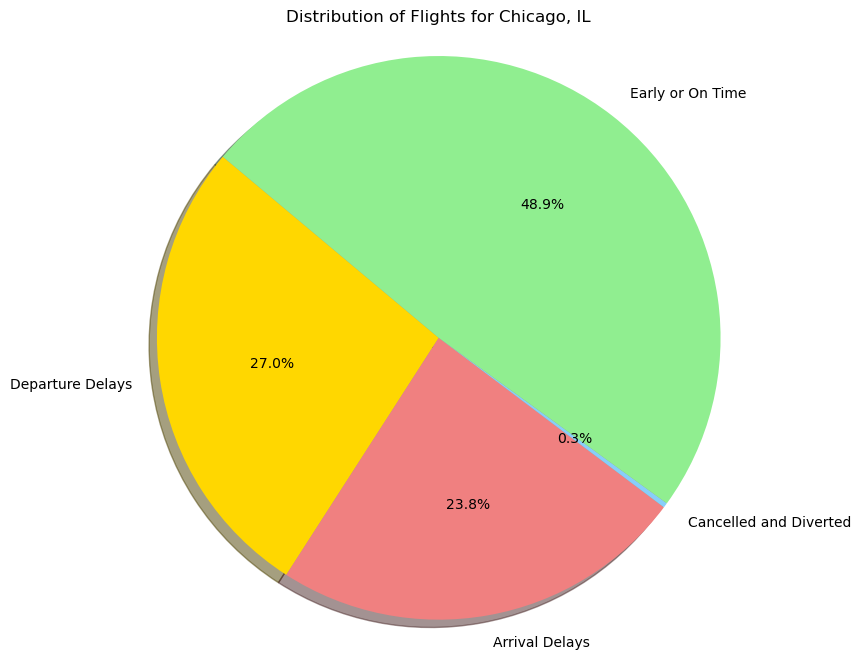

In [156]:
#Pie chart
# Data for the pie chart
labels = ['Departure Delays', 'Arrival Delays', 'Cancelled and Diverted', 'Early or On Time']
sizes = [count_chicago_dep, count_chicago_arr, count_cancelled + count_deverted, num_early_other_flights]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  
plt.title('Distribution of Flights for Chicago, IL')
plt.savefig("Chicago_Pie_Chart.png")
plt.show()